# AST 4930 Module 2

## hyperparameter optimization, cross validation, evaluation metric

### Let's load the iris data and run cross validation.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate

iris = load_iris()
model = DecisionTreeClassifier(max_depth=4, random_state=0)

scores = cross_val_score(model, iris.data, iris.target, cv=5)

print("Cross-validation scores: {}".format(scores))
print("Mean cross-validation scores: {:.3f}".format(scores.mean()))
print("Standard deviation cross-validation scores: {:.3f}".format(scores.std()))

Cross-validation scores: [0.96666667 0.96666667 0.9        1.         1.        ]
Mean cross-validation scores: 0.967
Standard deviation cross-validation scores: 0.037


### Let's split the data.

In [2]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

# If you want to reproduce the result, make sure you use the same random_state value.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### We can use for loops for hyperparameter optimization.

In [3]:
import numpy as np

max_depth = np.arange(10)+1
criterion = ['gini','entropy']

best_score = 0

for i in max_depth:
    for j in criterion:
        model = DecisionTreeClassifier(max_depth=i, criterion=j, random_state=0)
        score = cross_val_score(model, X_train, y_train, cv=5)
        score = np.mean(score)
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth': i, 'criterion': j}
    
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.96
Best parameters: {'max_depth': 3, 'criterion': 'gini'}


### But we can take advantage of built-in modules.

In [5]:
from sklearn.model_selection import GridSearchCV

# Grid of parameters in a dictionary 
param_grid = {'max_depth': np.arange(10)+1,
              'criterion': ['gini','entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, 
                           return_train_score=True, verbose=3)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END criterion=gini, max_depth=1;, score=(train=0.697, test=0.696) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1;, score=(train=0.697, test=0.696) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1;, score=(train=0.700, test=0.682) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1;, score=(train=0.700, test=0.682) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1;, score=(train=0.689, test=0.727) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2;, score=(train=0.966, test=0.957) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2;, score=(train=0.966, test=0.913) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2;, score=(train=0.956, test=1.000) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2;, score=(train=0.978, test=0.909) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2;, score=(train=0.956, test=0.955) total time=   0.0

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             return_train_score=True, verbose=3)

In [6]:
help(grid_search)

Help on GridSearchCV in module sklearn.model_selection._search object:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either es

In [9]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'criterion': 'gini', 'max_depth': 3}
Best model: DecisionTreeClassifier(max_depth=3, random_state=0)
Test score: 0.97


In [10]:
grid_search.cv_results_

{'mean_fit_time': array([0.00103679, 0.00107198, 0.00067124, 0.00068817, 0.00067739,
        0.00072365, 0.00063238, 0.00062575, 0.00066695, 0.00062208,
        0.00053577, 0.00061531, 0.00062313, 0.00065489, 0.00063629,
        0.00062857, 0.00062337, 0.00061159, 0.00063524, 0.0006279 ]),
 'std_fit_time': array([3.03419566e-04, 3.35782091e-04, 5.35623350e-05, 5.90409518e-05,
        4.55199451e-05, 9.86791889e-05, 1.23201287e-05, 2.36434309e-05,
        4.99848631e-05, 1.47136525e-05, 5.16204360e-05, 3.83423926e-05,
        1.68753203e-05, 5.38584140e-05, 1.06713557e-05, 2.94755569e-05,
        1.31408223e-05, 1.60945079e-05, 4.28799907e-05, 3.34434560e-05]),
 'mean_score_time': array([0.0002542 , 0.00022268, 0.00017257, 0.00016804, 0.00016913,
        0.00017495, 0.00015836, 0.0001574 , 0.00017395, 0.0001595 ,
        0.00016079, 0.00017724, 0.00015583, 0.00016341, 0.00016241,
        0.00015421, 0.0001545 , 0.00015688, 0.00015559, 0.00016403]),
 'std_score_time': array([8.12863172e-

In [11]:
grid_search.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

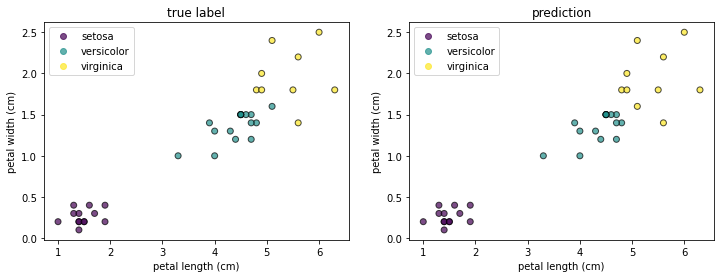

In [12]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(figsize=(12, 4), ncols=2)

#This is to make sure that the color scale uses minimum = 0 & maximum = 2.
norm = plt.Normalize(vmin=iris.target.min(), vmax=iris.target.max())

plot = ax1.scatter(X_test[:,2], X_test[:,3], alpha=0.7, c=y_test, cmap='viridis', norm=norm, edgecolor='k')

ax1.set_xlabel(iris.feature_names[2])
ax1.set_ylabel(iris.feature_names[3])
ax1.set_title('true label')
ax1.legend(plot.legend_elements()[0], iris.target_names)

plot = ax2.scatter(X_test[:,2], X_test[:,3], alpha=0.7, c=grid_search.predict(X_test), 
                  cmap='viridis', norm=norm, edgecolor='k')

ax2.set_xlabel(iris.feature_names[2])
ax2.set_ylabel(iris.feature_names[3])
ax2.set_title('prediction')
ax2.legend(plot.legend_elements()[0], iris.target_names)


### Let's make a heatmap.

Text(51.0, 0.5, 'criterion')

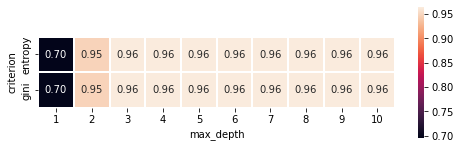

In [13]:
import pandas as pd
import seaborn as sns

results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(2,10)

toplot_x = list(grid_search.param_grid.keys())[0]
toplot_y = list(grid_search.param_grid.keys())[1]

plt.figure(figsize = (8,3))

ax = sns.heatmap(scores[::-1,:], annot=True, fmt=".2f", 
                 xticklabels=np.array(grid_search.param_grid[toplot_x]).astype(str),
                 yticklabels=np.array(grid_search.param_grid[toplot_y][::-1]).astype(str),
                 linewidth=2, square=True, cbar_kws={"shrink": .8}
                 )

ax.set_xlabel(toplot_x)
ax.set_ylabel(toplot_y)

### What if we need feature scaling?

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# We use a "pipeline"
# Sequentially apply a list of transforms and a final estimator. 
# Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. 
# The final estimator only needs to implement fit.
# See https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

pipe = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {'knn__n_neighbors': np.arange(10)+1,
              'knn__weights': ['uniform','distance']}

grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END knn__n_neighbors=1, knn__weights=uniform;, score=(train=1.000, test=0.957) total time=   0.0s
[CV 2/5] END knn__n_neighbors=1, knn__weights=uniform;, score=(train=1.000, test=0.913) total time=   0.0s
[CV 3/5] END knn__n_neighbors=1, knn__weights=uniform;, score=(train=1.000, test=0.955) total time=   0.0s
[CV 4/5] END knn__n_neighbors=1, knn__weights=uniform;, score=(train=1.000, test=0.909) total time=   0.0s
[CV 5/5] END knn__n_neighbors=1, knn__weights=uniform;, score=(train=1.000, test=0.955) total time=   0.0s
[CV 1/5] END knn__n_neighbors=1, knn__weights=distance;, score=(train=1.000, test=0.957) total time=   0.0s
[CV 2/5] END knn__n_neighbors=1, knn__weights=distance;, score=(train=1.000, test=0.913) total time=   0.0s
[CV 3/5] END knn__n_neighbors=1, knn__weights=distance;, score=(train=1.000, test=0.955) total time=   0.0s
[CV 4/5] END knn__n_neighbors=1, knn__weights=distance;, score=(train=1.000, te

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'knn__weights': ['uniform', 'distance']},
             return_train_score=True, verbose=3)

In [15]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))

print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'knn__n_neighbors': 5, 'knn__weights': 'distance'}
Best model: Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(weights='distance'))])
Test score: 0.97


In [16]:
grid_search.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(figsize=(12, 4), ncols=2)

#This is to make sure that the color scale uses minimum = 0 & maximum = 2.
norm = plt.Normalize(vmin=iris.target.min(), vmax=iris.target.max())

plot = ax1.scatter(X_test[:,2], X_test[:,3], alpha=0.7, c=y_test, cmap='viridis', norm=norm, edgecolor='k')

ax1.set_xlabel(iris.feature_names[2])
ax1.set_ylabel(iris.feature_names[3])
ax1.set_title('true label')
ax1.legend(plot.legend_elements()[0], iris.target_names)

plot = ax2.scatter(X_test[:,2], X_test[:,3], alpha=0.7, c=grid_search.predict(X_test), 
                  cmap='viridis', norm=norm, edgecolor='k')

ax2.set_xlabel(iris.feature_names[2])
ax2.set_ylabel(iris.feature_names[3])
ax2.set_title('prediction')
ax2.legend(plot.legend_elements()[0], iris.target_names)


### Let's load the SDSS data we used for homework #3 and test parallelization.

In [ ]:
import pandas as pd 
import numpy as np

data = pd.read_csv('SDSS.csv')
data

In [ ]:
# X for an array containing features (i.e., colors)
X = np.array([data['u'], data['g'], data['r'], data['i'], data['z']]).T

# y for an array containing labels (i.e., galaxies or quasars)
y = np.expand_dims(data['class'], axis=1)

#If you want to reproduce the result, make sure you use the same random_state value.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### TODO: Hyperparameter optimization with 1 CPU core

In [36]:
from sklearn.model_selection import GridSearchCV
import time

tstart = time.time()

data = pd.read_csv('SDSS.csv')

from sklearn.model_selection import GridSearchCV
import time

tstart = time.time()


param_grid = {'max_depth': np.arange(20)+1,
              'criterion': ['gini','entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5,
                           return_train_score=True, verbose=3, n_jobs=1)
#this searches for best model parameters

grid_search.fit(X_train, y_train)


print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))


print("Elapsed time: {:.3f}".format(time.time()-tstart) + " seconds")






print("Elapsed time: {:.3f}".format(time.time()-tstart) + " seconds")

[CV 1/5] END criterion=gini, max_depth=1;, score=(train=0.697, test=0.696) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1;, score=(train=0.700, test=0.682) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2;, score=(train=0.966, test=0.913) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2;, score=(train=0.978, test=0.909) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3;, score=(train=0.978, test=1.000) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3;, score=(train=0.989, test=0.955) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4;, score=(train=1.000, test=0.909) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4;, score=(train=1.000, test=0.955) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5;, score=(train=1.00

### TODO: Now the same task with 2 CPU cores (hint: use "n_jobs=2")

In [34]:
from sklearn.model_selection import GridSearchCV
import time

tstart = time.time()

data = pd.read_csv('SDSS.csv')

from sklearn.model_selection import GridSearchCV
import time

tstart = time.time()


param_grid = {'max_depth': np.arange(10)+1,
              'criterion': ['gini','entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5,
                           return_train_score=True, verbose=3, n_jobs=2)
#this searches for best model parameters

grid_search.fit(X_train, y_train)


print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))


print("Elapsed time: {:.3f}".format(time.time()-tstart) + " seconds")






print("Elapsed time: {:.3f}".format(time.time()-tstart) + " seconds")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'criterion': 'gini', 'max_depth': 3}
Best model: DecisionTreeClassifier(max_depth=3, random_state=0)
Test score: 0.97
Elapsed time: 1.337 seconds
Elapsed time: 1.337 seconds


## Imbalanced data and evaluation metric

For all available sklearn's evaluation metric, see https://scikit-learn.org/stable/modules/model_evaluation.html

Counter({0: 9001, 1: 999})


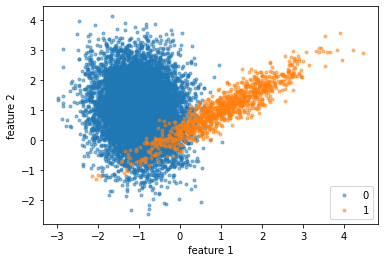

In [38]:
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# generate imbalanced dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=2)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), alpha=0.5, marker='.')

plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(loc='lower right')

In [39]:
help(make_classification)

Help on function make_classification in module sklearn.datasets._samples_generator:

make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
    Generate a random n-class classification problem.
    
    This initially creates clusters of points normally distributed (std=1)
    about vertices of an ``n_informative``-dimensional hypercube with sides of
    length ``2*class_sep`` and assigns an equal number of clusters to each
    class. It introduces interdependence between these features and adds
    various types of further noise to the data.
    
    Without shuffling, ``X`` horizontally stacks features in the following
    order: the primary ``n_informative`` features, followed by ``n_redundant``
    linear combinations of the informative features, followed by ``n_repeated``
    duplicates, dr

### Split the data.

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [44]:
param_grid = {'max_depth': np.arange(10)+1,
              'criterion': ['gini','entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, 
                           return_train_score=True, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'criterion': 'gini', 'max_depth': 3}
Best model: DecisionTreeClassifier(max_depth=3, random_state=0)
Test score: 0.97


### We got 97% accuracy! But let's have a look at the result (make this as a habit). 

### This is the true class.

Counter({0: 2256, 1: 244})


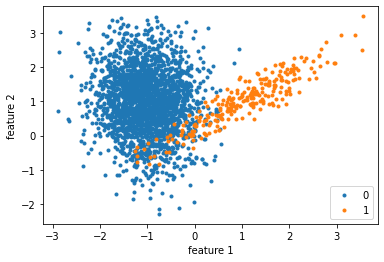

In [42]:
counter = Counter(y_test)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y_test == label)[0]
    plt.scatter(X_test[row_ix, 0], X_test[row_ix, 1], label=str(label), alpha=1, marker='.')

plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(loc='lower right')


### This is our best model. Are we good with it?

Counter({0: 2298, 1: 202})


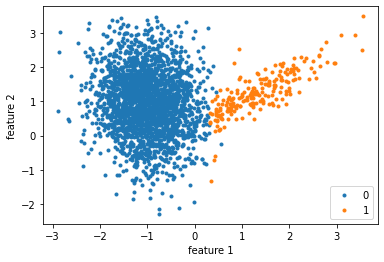

In [43]:
## ** operator takes a dictionary and unpack it into keaword arguments in a function.
model = DecisionTreeClassifier(**grid_search.best_params_, random_state=0)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

counter = Counter(prediction)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(prediction == label)[0]
    plt.scatter(X_test[row_ix, 0], X_test[row_ix, 1], label=str(label), alpha=1, marker='.')

plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(loc='lower right')


### Although we got a pretty high accuracy, this may not necesarily the result we wanted.

### Let's check out different evaluation metric

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

### TODO: I'd like to minimize false negatives. Let's use "recall" as the evaluation metric.

In [45]:
param_grid = {'max_depth': np.arange(10)+1,
              'criterion': ['gini','entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, 
                           return_train_score=True, verbose=1, scoring='recall')

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))







Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 8}
Best model: DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)
Test score: 0.84


### TODO: Make a plot showing your prediction. Is it any better?

Counter({0: 2273, 1: 227})


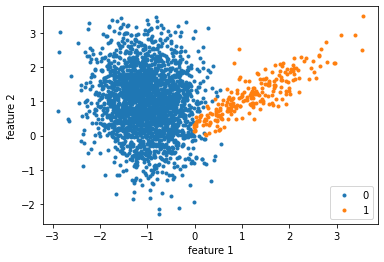

In [46]:
## ** operator takes a dictionary and unpack it into keaword arguments in a function.
model = DecisionTreeClassifier(**grid_search.best_params_, random_state=0)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

counter = Counter(prediction)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(prediction == label)[0]
    plt.scatter(X_test[row_ix, 0], X_test[row_ix, 1], label=str(label), alpha=1, marker='.')

plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(loc='lower right')




